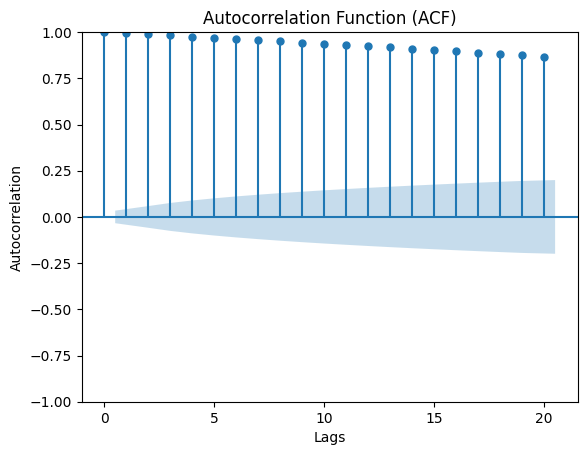

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


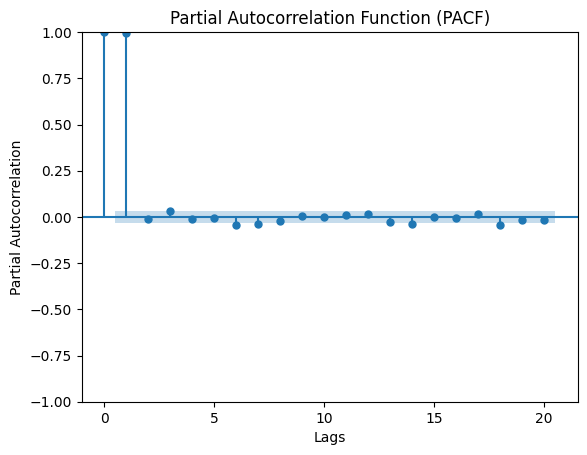

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


df = pd.read_csv('test.csv')
df.drop(['Trades', 'Deliverable Volume', 'Volume', 'Turnover', '%Deliverble', 'Symbol', 'Series'], inplace = True,axis=1)

mape_values = []


open_prices = df['Open']


plot_acf(open_prices, lags=20)  
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()


plot_pacf(open_prices, lags=20) 
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


We can conclude that the AR term must be 1, the values for ACF at lag 1 are posititve and PACF drops suddenly

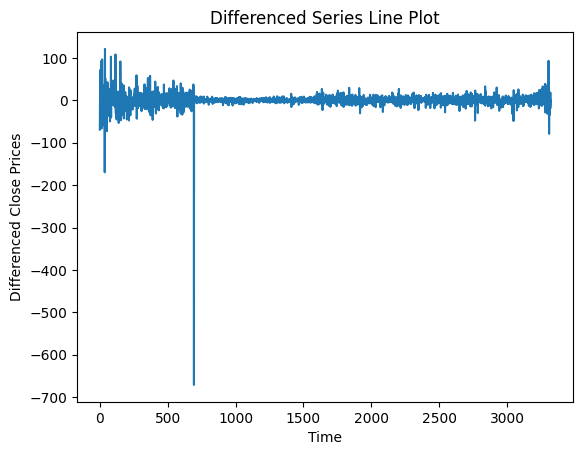

In [91]:
differenced_close_prices = close_prices.diff().dropna()

plt.plot(differenced_close_prices)
plt.xlabel('Time')
plt.ylabel('Differenced Close Prices')
plt.title('Differenced Series Line Plot')
plt.show()

We can see that the differenced values are stagnant. We can conclude that d should be 1

In [114]:
a=0.4
y = pd.DataFrame({'Date': df['Date'], 'Open': df['Open']})
y['Date'] = pd.to_datetime(df['Date'])
y.set_index('Date', inplace=True)
y = y.resample('D').asfreq()
y['Open'] = y['Open'].ffill()
tss = TimeSeriesSplit(n_splits = 5)

y_train= y['Open'].iloc[:int(-a*len(df.index))] 
y_test = y['Open'].iloc[int(-a*len(df.index)):] 
model = ARIMA(y_train, order=(1, 1, 0))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
mean_absolute_percentage_error(y_test, y_pred)



12.275715004167338